**GROUP 15 PROJECT PROPOSAL: ANALYSIS OF THE STATISTICS OF THE TOP 500 TENNIS PLAYERS**

***Exploratory Data Analysis of the Top 500 Tennis Players' Characteristics***

**INTRODUCTION:**

For our project, we will be using a .csv dataset that has been created by "The Ultimate Tennis Statistics". This dataset contains information on the top 500 tennis players, including their age, height, country, handedness, backhand technique, current and best rank, seasons as a professional tennis player, in addition to a few other less relevant variables.

Tennis is a sport that is widely popular among players of all ages; most in which are striving to make it to the professional level of play. At this level, the top 500 players are known not only for the exceptional tennis playing skills, but also their wealth and prestige. This is why we have taken an interest in predicting a professional tennis player's total prize money based upon their age and best career ranking, using the k-nearest neighbors regression algorithm. 

***Predictive Question:***

Can we predict a professional tennis player's total prize money based on their age and best career ranking?


**Preliminary exploratory data analysis:**

- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [78]:
#import libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
install.packages("janitor")
library(janitor)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [79]:
tennis_data <- read_csv("https://raw.githubusercontent.com/Myralalala/group15/main/tennis_player_stats.csv")

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [148]:
#clean and wrangle the data
tennis_data <- tennis_data |>
    clean_names() |>
    select(age, best_rank, prize_money)

#Tidying the data
tennis_data_tidy <- tennis_data |>
        separate(col = age,
                 into = c("age", "Birthdate"),
                 sep = " ") |>
        separate(col = best_rank,
                 into = c("best_rank", "best_rank_date"),
                 sep = " ") |> 
        separate(col = prize_money,
                 into = c("currency", "prize_money"),
                 sep = "\\$") |>
        separate(col = prize_money,  #This separate function removes the prize money annotation on highest all-time earning
                into = c("prize_money", "money_information"),
                sep = " ") |>
        mutate(age = as.double(age), best_rank = as.double(best_rank), prize_money = as.double(gsub(",", "", prize_money))) |>
        select(age, best_rank, prize_money)


Warning message:
“Expected 2 pieces. Additional pieces discarded in 2 rows [146, 441].”
Warning message:
“Expected 2 pieces. Additional pieces discarded in 20 rows [16, 96, 128, 142,
208, 212, 267, 274, 337, 363, 364, 381, 394, 414, 423, 435, 436, 461, 468,
497].”
Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 397 rows [2, 3, 4, 5, 6,
7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, ...].”


In [150]:
#Manually Inputting the data for rows 146 and 441
tennis_data_tidy[146, 3] <- 7487708
tennis_data_tidy[441, 3] <- 156950

tennis_data_tidy

age,best_rank,prize_money
<dbl>,<dbl>,<dbl>
26,363,NA
18,316,59040
32,44,3261567
21,130,374093
27,17,6091971
22,31,1517157
28,213,278709
21,229,59123
25,253,122734


In [4]:
#using the training set:
    #summarize the data from at least one table
        #ex: counts of observations, means of the predictors to be used & number of rows missing data
    #visualize the data with at least one plot relevant to the analysis we plan to do

Warning message:
“Removed 81 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 81 rows containing missing values (`geom_point()`).”


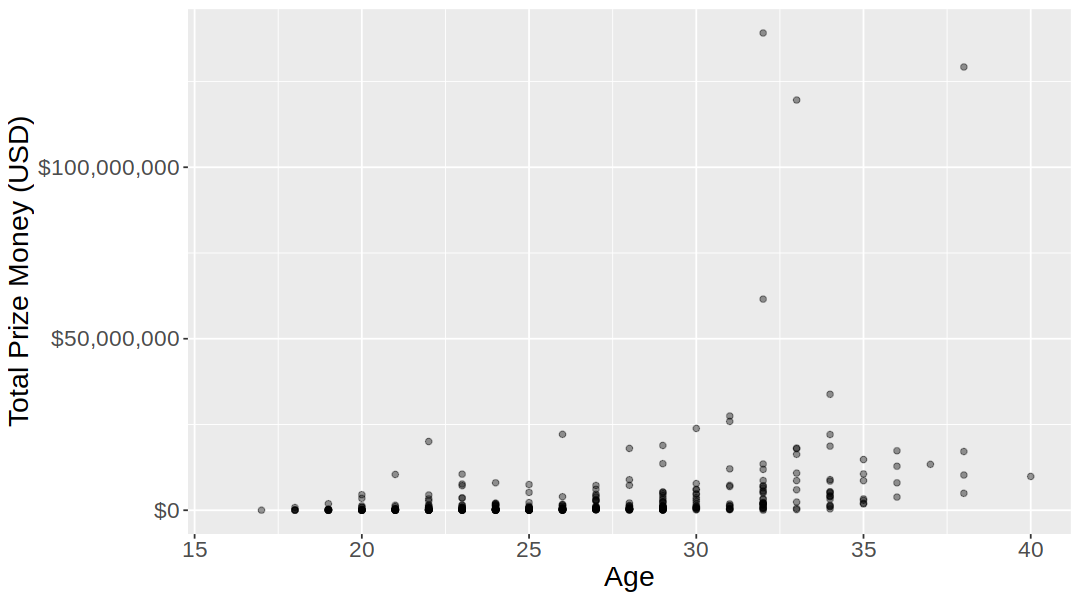

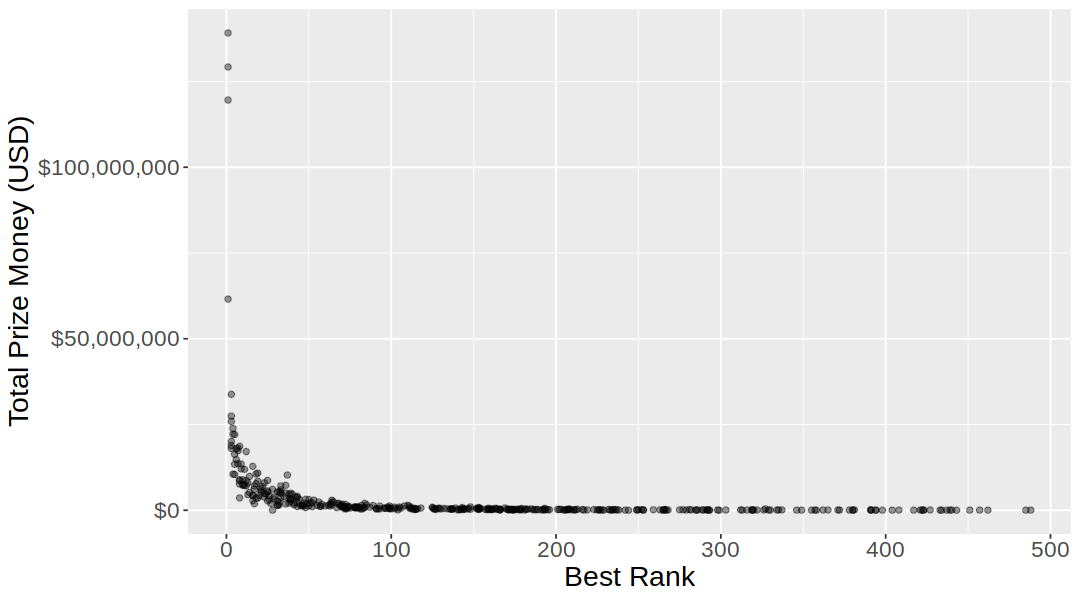

In [154]:
#Initial graphs of the predictor variables and the response variable we are predicting (Prize money)
options(repr.plot.width = 9, repr.plot.height = 5)

age_graph <- tennis_data_tidy |>
  ggplot(aes(x = age, y = prize_money)) +
    geom_point(alpha = 0.4) +
    xlab("Age") +
    ylab("Total Prize Money (USD)") +
    scale_y_continuous(labels = dollar_format()) +
    theme(text = element_text(size = 17))

best_rank_graph <- tennis_data_tidy |>
  ggplot(aes(x = best_rank, y = prize_money)) +
    geom_point(alpha = 0.4) +
    xlab("Best Rank") +
    ylab("Total Prize Money (USD)") +
    scale_y_continuous(labels = dollar_format()) +
    theme(text = element_text(size = 17))

age_graph
best_rank_graph

**Methods:**

-> Explain how you will conduct either your data analysis and which variables/columns you will use

**Expected outcomes and significance:**

* What do you expect to find?
Given the nature of rankings, which is done through winning games, we hypothesize that 
* What impact could such findings have?
* What future questions could this lead to?


***NOTE: needs to be submitted as both .ipynb and .html files by one of us***